In [1]:
import sys
sys.path.append('../')
from pychemkin import ChemSolver, chemkin, InputParser, ReactionCoeffs,BackwardCoeffs
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.integrate import solve_ivp, ode
x_init = np.ones(4)*1.e-10
T = 1000
chem = chemkin("../tests/test_xml/rxns_singlereversible.xml")
cs = ChemSolver(chem)
_,cs.kf,cs.kb = cs.chem._progress_rate_init(x_init,T)
cs.nu_diff_matrix = cs.chem.nu_prod-cs.chem.nu_react
print(solve_ivp(cs._ChemSolver__dy_dt, 
          t_span=(0, 6e-5), 
          y0=x_init, 
          t_eval=np.linspace(0,6e-5,20), method = 'Radau'))

print("Using scipy.integrate.ode")

r = ode(cs._ChemSolver__dy_dt).set_integrator('lsoda')
r.set_initial_value(x_init,0)
t1 = 6.0e-5
dt = 3.15789474e-06
while r.successful() and r.t <= t1:
    print(r.t+dt, r.integrate(r.t+dt))

Finished reading xml input file
  message: 'Required step size is less than spacing between numbers.'
     nfev: 1352
     njev: 36
      nlu: 274
      sol: None
   status: -1
  success: False
        t: array([  0.00000000e+00,   3.15789474e-06])
 t_events: None
        y: array([[  1.00000000e-10,   1.38997024e-10],
       [  1.00000000e-10,   1.38997024e-10],
       [  1.00000000e-10,   6.10029761e-11],
       [  1.00000000e-10,   6.10029761e-11]])
Using scipy.integrate.ode
3.15789474e-06 [  1.68923614e-10   1.68923614e-10   3.10763860e-11   3.10763860e-11]
6.31578948e-06 [  1.80149047e-10   1.80149047e-10   1.98509530e-11   1.98509530e-11]
9.47368422e-06 [  1.84242662e-10   1.84242662e-10   1.57573384e-11   1.57573384e-11]
1.263157896e-05 [  1.86098221e-10   1.86098221e-10   1.39017792e-11   1.39017792e-11]
1.57894737e-05 [  1.87038096e-10   1.87038096e-10   1.29619037e-11   1.29619037e-11]
1.894736844e-05 [  1.87529210e-10   1.87529210e-10   1.24707897e-11   1.24707897e-11]
2.210

In [3]:
from scipy.integrate import solve_ivp, ode
x_init = np.ones(4)*1.e-10
T = 1000
chem = chemkin("../tests/test_xml/rxns_singlereversible.xml")
cs = ChemSolver(chem)
_,cs.kf,cs.kb = cs.chem._progress_rate_init(x_init,T)
cs.nu_diff_matrix = cs.chem.nu_prod-cs.chem.nu_react
print(solve_ivp(cs._ChemSolver__dy_dt, 
          t_span=(0, 7e-5), 
          y0=x_init, 
          t_eval=np.linspace(0,7e-5,20), method = 'LSODA'))

print("Using scipy.integrate.ode")

r = ode(cs._ChemSolver__dy_dt).set_integrator('lsoda')
r.set_initial_value(x_init,0)
t1 = 7.0e-5
dt = 3.68421053e-06
while r.successful() and r.t <= t1:
    print(r.t+dt, r.integrate(r.t+dt))

Finished reading xml input file
  message: 'The solver successfully reached the interval end.'
     nfev: 44
     njev: 1
      nlu: 1
      sol: None
   status: 0
  success: True
        t: array([  0.00000000e+00,   3.68421053e-06,   7.36842105e-06,
         1.10526316e-05,   1.47368421e-05,   1.84210526e-05,
         2.21052632e-05,   2.57894737e-05,   2.94736842e-05,
         3.31578947e-05,   3.68421053e-05,   4.05263158e-05,
         4.42105263e-05,   4.78947368e-05,   5.15789474e-05,
         5.52631579e-05,   5.89473684e-05,   6.26315789e-05,
         6.63157895e-05,   7.00000000e-05])
 t_events: None
        y: array([[  1.00000000e-10,   1.46963082e-10,   1.84251428e-10,
          1.87352333e-10,   1.87836997e-10,   1.88003475e-10,
          1.88069885e-10,   1.88095959e-10,   1.88113270e-10,
          1.88122803e-10,   1.88127346e-10,   1.88129650e-10,
          1.88130882e-10,   1.88131525e-10,   1.88131854e-10,
          1.88132024e-10,   1.88132143e-10,   1.88132311e-10,


In [75]:
x_init = np.ones(4)*0.1
T = 1000
def get_equilibrium_conc(x_init, T):
    file_name = "../tests/test_xml/rxns_singlereversible.xml"
    input_ = InputParser(file_name)
    rc_list = [ReactionCoeffs(**params) for params in input_.rate_coeff_params]
    rc_list[0].set_params(T=T)
    kf = rc_list[0].k_forward()
    bc = BackwardCoeffs(input_.nu_react, input_.nu_prod,input_.species)
    kb = bc.backward_coeffs(np.array([kf]), T)[0]
    k_eq = kf/kb
    A = (1-k_eq)
    B = x_init[2]+x_init[3]+k_eq*(x_init[0]+x_init[1])
    C = x_init[2]*x_init[3]-k_eq*x_init[0]*x_init[1]
    deltax =  (-B+np.sqrt(B**2-4*A*C))/(2*A)
    return np.array([x_init[0]-deltax,x_init[1]-deltax,x_init[2]+deltax,x_init[3]+deltax])
    
equilibrium_vals = get_equilibrium_conc(x_init, T)
print(equilibrium_vals)

Finished reading xml input file
[ 0.18813221  0.18813221  0.01186779  0.01186779]


Finished reading xml input file


,t,H-Concentration,O2-Concentration,O-Concentration,OH-Concentration,H-Reaction_rate,O2-Reaction_rate,O-Reaction_rate,OH-Reaction_rate,T
92,4.600000e-14,0.188128,0.188128,0.011872,0.011872,7.392137e+08,7.392137e+08,-7.392137e+08,-7.392137e+08,1000.0
93,4.650000e-14,0.188129,0.188129,0.011871,0.011871,6.739107e+08,6.739107e+08,-6.739107e+08,-6.739107e+08,1000.0
94,4.700000e-14,0.188129,0.188129,0.011871,0.011871,6.144304e+08,6.144304e+08,-6.144304e+08,-6.144304e+08,1000.0
95,4.750000e-14,0.188129,0.188129,0.011871,0.011871,5.601668e+08,5.601668e+08,-5.601668e+08,-5.601668e+08,1000.0
96,4.800000e-14,0.188129,0.188129,0.011871,0.011871,5.108538e+08,5.108538e+08,-5.108538e+08,-5.108538e+08,1000.0
97,4.850000e-14,0.188130,0.188130,0.011870,0.011870,4.659961e+08,4.659961e+08,-4.659961e+08,-4.659961e+08,1000.0
98,4.900000e-14,0.188130,0.188130,0.011870,0.011870,4.250775e+08,4.250775e+08,-4.250775e+08,-4.250775e+08,1000.0
99,4.950000e-14,0.188130,0.188130,0.011870,0.011870,3.876343e+08,3.876343e+08,-3.876343e+08,-3.876343e+08,1000.0
100,5.000000e-14,0.188130,0.188130,0.011870,0.011870,3.535185e+08,3.535185e+08,-3.535185e+08,-3.535185e+08,1000.0
101,5.050000e-14,0.188130,0.188130,0.011870,0.011870,3.224453e+08,3.224453e+08,-3.224453e+08,-3.224453e+08,1000.0


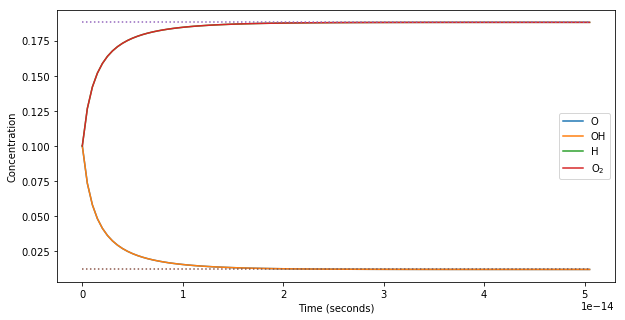

In [83]:
chem = chemkin("../tests/test_xml/rxns_singlereversible.xml")
# initial concentration
x_init = np.ones(4)*0.1
T = 1000
t_final = 5.e-14
t_step = 5.e-16
cs = ChemSolver(chem)
sols = cs.solve(x_init, T, t_final, t_step, algorithm = 'vode', method = 'bdf')
df_vode = sols.to_df()
def plot_demo(df):
    plt.figure(figsize = (10,5))
    plt.plot(df['t'],df['O-Concentration'], label = 'O')
    plt.plot(df['t'],df['OH-Concentration'], label = 'OH')
    plt.plot(df['t'],df['H-Concentration'], label = 'H')
    plt.plot(df['t'],df['O2-Concentration'], label = 'O$_2$')
    plt.plot(df['t'],np.ones_like(df['t'])*equilibrium_vals[0], linestyle = ':')
    plt.plot(df['t'],np.ones_like(df['t'])*equilibrium_vals[2], linestyle = ':')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Concentration')
    plt.legend()
plot_demo(df_vode)
df_vode.tail(10)
#print(cs._jac(0, np.array([3.77e-10, 3.77e-10, 2.26e-11, 2.26e-11])))
#print(cs.T)

In [6]:
chem = chemkin("../tests/test_xml/rxns_singlereversible.xml")
# initial concentration
x_init = np.array([2,1,1,2])*1.e-10
T = 1000
cs = ChemSolver(chem)
cs.T = T
derivs = np.zeros(chem.nu_react.shape)
print(chem.nu_react)
x_init,kf, kb = chem._progress_rate_init(x_init, T)
print(kf)
print(kb)
for i in range(len(chem.nu_react)):
    prod1 = x_init**chem.nu_react
    masked_prod1 = np.ma.array(prod1, mask = False)
    masked_prod1[i] = True
    derivs[i] =chem.nu_react[i]*x_init[i]**(chem.nu_react[i]-1)*kf*np.product(masked_prod1, axis = 0)

    if np.any(chem.reversible):
        prod2 = x_init**chem.nu_prod
        masked_prod2 = np.ma.array(prod2, mask = False)
        masked_prod2[i] = True
        #print(chem.nu_prod[i]*x_init[i]**(chem.nu_prod[i]-1)*  kb * np.product(masked_prod2[:, chem.reversible], axis=0))
        #print(derivs[i,chem.reversible])
        derivs[i,chem.reversible] = derivs[i,chem.reversible] -chem.nu_prod[i]*x_init[i]**(chem.nu_prod[i]-1)*  kb * np.product(masked_prod2[:, chem.reversible], axis=0)

#print(cs._jac(0,x_init))
print(derivs)
jac = np.zeros((len(chem.species), len(chem.species)))
nu_diff_matrix = chem.nu_prod-chem.nu_react
for j in range(len(chem.species)):
    jac[:,j] = np.sum(derivs[j] * nu_diff_matrix, axis=1)
print(jac)

Finished reading xml input file
[[1]
 [1]
 [0]
 [0]]
[  2.91599707e+13]
[  7.32779883e+15]
[[    2915.9970745 ]
 [    5831.99414899]
 [-1465559.76618743]
 [ -732779.88309372]]
[[   -2915.9970745     -5831.99414899  1465559.76618743   732779.88309372]
 [   -2915.9970745     -5831.99414899  1465559.76618743   732779.88309372]
 [    2915.9970745      5831.99414899 -1465559.76618743  -732779.88309372]
 [    2915.9970745      5831.99414899 -1465559.76618743  -732779.88309372]]


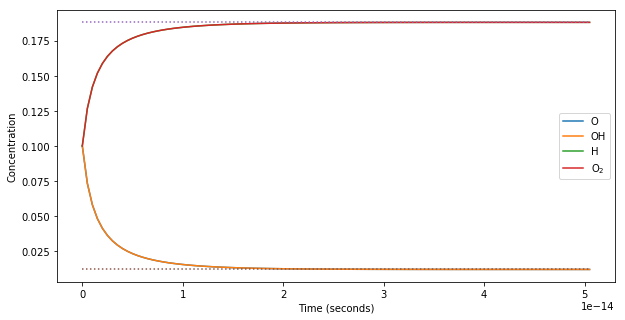

In [84]:
cs = ChemSolver(chem).solve(x_init, T, t_final, t_step, algorithm = 'dopri5')
df_dopri5 = cs.to_df()
plot_demo(df_dopri5)


,t,H-Concentration,O2-Concentration,O-Concentration,OH-Concentration,H-Reaction_rate,O2-Reaction_rate,O-Reaction_rate,OH-Reaction_rate,T
97,4.850000e-14,0.18813,0.18813,0.01187,0.01187,4.638079e+08,4.638079e+08,-4.638079e+08,-4.638079e+08,1000.0
98,4.900000e-14,0.18813,0.18813,0.01187,0.01187,4.227670e+08,4.227670e+08,-4.227670e+08,-4.227670e+08,1000.0
99,4.950000e-14,0.18813,0.18813,0.01187,0.01187,3.853509e+08,3.853509e+08,-3.853509e+08,-3.853509e+08,1000.0
100,5.000000e-14,0.18813,0.18813,0.01187,0.01187,3.512818e+08,3.512818e+08,-3.512818e+08,-3.512818e+08,1000.0
101,5.050000e-14,0.18813,0.18813,0.01187,0.01187,3.202506e+08,3.202506e+08,-3.202506e+08,-3.202506e+08,1000.0


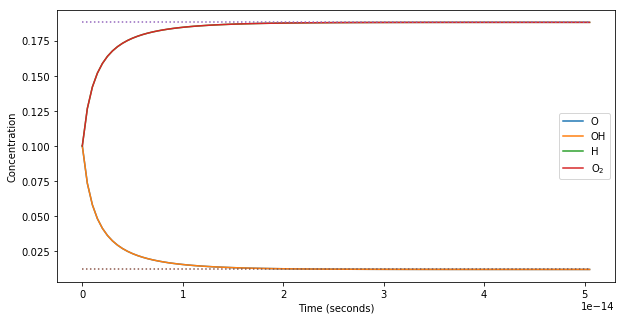

In [85]:
cs = ChemSolver(chem).solve(x_init, T, t_final, t_step, algorithm = 'lsoda')
df_lsoda = cs.to_df()
plot_demo(df_lsoda)
df_lsoda.tail(5)

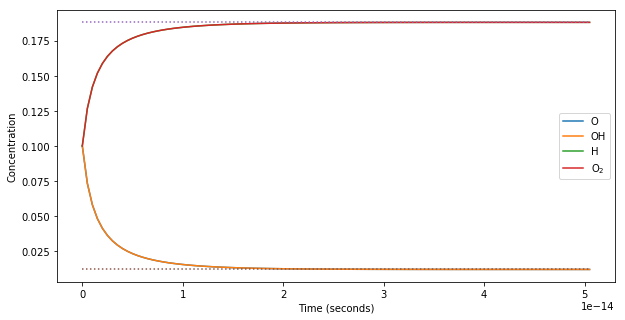

In [86]:
cs = ChemSolver(chem).solve(x_init, T, t_final, t_step, algorithm = 'dop853')
df_dop853 = cs.to_df()
plot_demo(df_dop853)

Finished reading xml input file


,t,H-Concentration,O-Concentration,OH-Concentration,H2-Concentration,H2O-Concentration,O2-Concentration,HO2-Concentration,H2O2-Concentration,H-Reaction_rate,O-Reaction_rate,OH-Reaction_rate,H2-Reaction_rate,H2O-Reaction_rate,O2-Reaction_rate,HO2-Reaction_rate,H2O2-Reaction_rate,T
1996,1.996000e-12,0.346492,0.263884,0.148298,0.14223,0.610375,0.488721,5.570540e-07,1.412936e-09,3.412817e+07,3.849454e+06,-1.910180e+07,-4.549084e+07,3.797770e+07,-1.136260e+07,-75.986610,-0.721174,2000.0
1997,1.997000e-12,0.346492,0.263884,0.148298,0.14223,0.610375,0.488721,5.570539e-07,1.412935e-09,3.616560e+07,1.695192e+06,-2.166104e+07,-4.511311e+07,3.786086e+07,-8.947437e+06,-70.742681,-0.712878,2000.0
1998,1.998000e-12,0.346492,0.263884,0.148298,0.14223,0.610375,0.488721,5.570538e-07,1.412934e-09,3.654012e+07,1.043495e+06,-2.228366e+07,-4.471188e+07,3.758369e+07,-8.171692e+06,-68.729768,-0.705845,2000.0
1999,1.999000e-12,0.346492,0.263884,0.148298,0.14223,0.610375,0.488721,5.570537e-07,1.412934e-09,3.663977e+07,6.425572e+05,-2.258474e+07,-4.430988e+07,3.728240e+07,-7.670038e+06,-67.260735,-0.699073,2000.0
2000,2.000000e-12,0.346492,0.263884,0.148298,0.14223,0.610375,0.488721,5.570536e-07,1.412933e-09,3.628890e+07,6.507545e+05,-2.235993e+07,-4.390417e+07,3.693972e+07,-7.615207e+06,-66.675484,-0.692687,2000.0


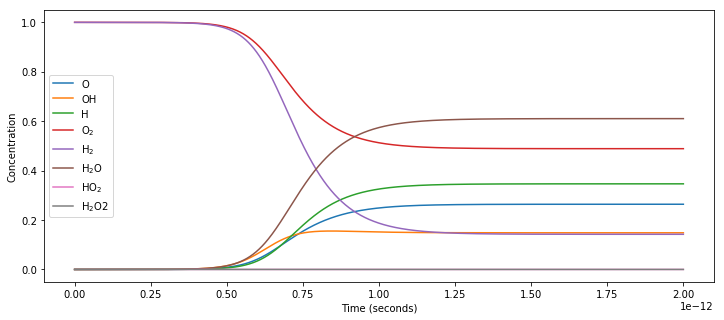

In [94]:
chem2 = chemkin("../tests/test_xml/rxns_reversible.xml")
# initial concentration
x_init = np.array([0,0,0,1,0,1,0,0])
T = 2000
t_final = 2.e-12
t_step = 1.e-15
cs = ChemSolver(chem2).solve(x_init, T, t_final, t_step, algorithm = 'vode', method = 'bdf')
df_vode = cs.to_df()
def plot_demo(df):
    plt.figure(figsize = (12,5))
    plt.plot(df['t'],df['O-Concentration'], label = 'O')
    plt.plot(df['t'],df['OH-Concentration'], label = 'OH')
    plt.plot(df['t'],df['H-Concentration'], label = 'H')
    plt.plot(df['t'],df['O2-Concentration'], label = 'O$_2$')
    plt.plot(df['t'],df['H2-Concentration'], label = 'H$_2$')
    plt.plot(df['t'],df['H2O-Concentration'], label = 'H$_2$O')
    plt.plot(df['t'],df['HO2-Concentration'], label = 'HO$_2$')
    plt.plot(df['t'],df['H2O2-Concentration'], label = 'H$_2$O2')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Concentration')
    plt.legend()
plot_demo(df_vode)
df_vode.tail(5)

Finished reading xml input file


,t,H-Concentration,O-Concentration,OH-Concentration,H2-Concentration,H2O-Concentration,O2-Concentration,HO2-Concentration,H2O2-Concentration,H-Reaction_rate,O-Reaction_rate,OH-Reaction_rate,H2-Reaction_rate,H2O-Reaction_rate,O2-Reaction_rate,HO2-Reaction_rate,H2O2-Reaction_rate,T
297,2.970000e-13,0.736340,0.667565,0.557105,0.449374,3.403901,2.185710,0.000004,1.501215e-07,6.831547e+09,4.594469e+09,-1.402979e+08,-1.478282e+10,1.144837e+10,-7.936532e+09,-7.122316e+06,-7.614862e+06,2000.0
298,2.980000e-13,0.736347,0.667570,0.557105,0.449359,3.403913,2.185702,0.000004,1.427155e-07,6.633379e+09,4.467191e+09,-1.317466e+08,-1.436196e+10,1.112171e+10,-7.714639e+09,-6.736686e+06,-7.200820e+06,2000.0
299,2.990000e-13,0.736353,0.667575,0.557105,0.449345,3.403924,2.185694,0.000004,1.357121e-07,6.484039e+09,4.304791e+09,-1.722174e+08,-1.395474e+10,1.080882e+10,-7.457516e+09,-6.371873e+06,-6.809286e+06,2000.0
300,3.000000e-13,0.736359,0.667579,0.557106,0.449332,3.403934,2.185687,0.000004,1.290896e-07,6.336010e+09,4.149635e+09,-2.082412e+08,-1.355898e+10,1.050455e+10,-7.210506e+09,-6.026849e+06,-6.439037e+06,2000.0
301,3.010000e-13,0.736365,0.667584,0.557106,0.449318,3.403944,2.185679,0.000004,1.228272e-07,6.147155e+09,4.039269e+09,-1.924166e+08,-1.317273e+10,1.020430e+10,-7.013788e+09,-5.700635e+06,-6.088918e+06,2000.0


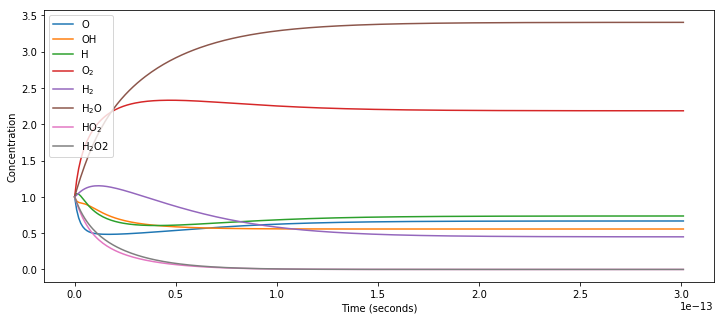

In [95]:
chem2 = chemkin("../tests/test_xml/rxns_reversible.xml")
# initial concentration
#x_init = np.array([0,0,0,1,0,1,0,0])
x_init = np.ones(8)
T = 2000
t_final = 3.e-13
t_step = 1.e-15
cs = ChemSolver(chem2).solve(x_init, T, t_final, t_step, algorithm = 'vode', method = 'bdf')
df_vode = cs.to_df()
def plot_demo(df):
    plt.figure(figsize = (12,5))
    plt.plot(df['t'],df['O-Concentration'], label = 'O')
    plt.plot(df['t'],df['OH-Concentration'], label = 'OH')
    plt.plot(df['t'],df['H-Concentration'], label = 'H')
    plt.plot(df['t'],df['O2-Concentration'], label = 'O$_2$')
    plt.plot(df['t'],df['H2-Concentration'], label = 'H$_2$')
    plt.plot(df['t'],df['H2O-Concentration'], label = 'H$_2$O')
    plt.plot(df['t'],df['HO2-Concentration'], label = 'HO$_2$')
    plt.plot(df['t'],df['H2O2-Concentration'], label = 'H$_2$O2')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Concentration')
    plt.legend()
plot_demo(df_vode)
df_vode.tail(5)

Finished reading xml input file


,t,H-Concentration,O-Concentration,OH-Concentration,H2-Concentration,H2O-Concentration,O2-Concentration,HO2-Concentration,H2O2-Concentration,H-Reaction_rate,O-Reaction_rate,OH-Reaction_rate,H2-Reaction_rate,H2O-Reaction_rate,O2-Reaction_rate,HO2-Reaction_rate,H2O2-Reaction_rate,T
292,2.920000e-13,0.736306,0.667539,0.557103,0.449453,3.403840,2.185755,0.000004,1.940583e-07,7.540211e+09,5.622978e+09,2.333603e+08,-1.706475e+10,1.319274e+10,-9.505058e+09,-9.409926e+06,-1.007111e+07,2000.0
293,2.930000e-13,0.736313,0.667544,0.557103,0.449437,3.403853,2.185746,0.000004,1.842639e-07,7.298692e+09,5.487317e+09,2.575974e+08,-1.657813e+10,1.281396e+10,-9.261012e+09,-8.900321e+06,-9.523582e+06,2000.0
294,2.940000e-13,0.736320,0.667549,0.557104,0.449420,3.403866,2.185737,0.000004,1.750022e-07,7.049641e+09,5.368415e+09,2.973750e+08,-1.610478e+10,1.244449e+10,-9.037713e+09,-8.418398e+06,-9.005820e+06,2000.0
295,2.950000e-13,0.736328,0.667555,0.557104,0.449404,3.403878,2.185728,0.000004,1.662437e-07,6.791759e+09,5.267150e+09,3.539591e+08,-1.564427e+10,1.208390e+10,-8.836027e+09,-7.962636e+06,-8.516185e+06,2000.0
296,2.960000e-13,0.736334,0.667560,0.557104,0.449389,3.403890,2.185719,0.000004,1.579612e-07,6.641515e+09,5.078802e+09,2.956754e+08,-1.520073e+10,1.174396e+10,-8.543632e+09,-7.531354e+06,-8.053149e+06,2000.0
297,2.970000e-13,0.736341,0.667565,0.557104,0.449374,3.403901,2.185711,0.000004,1.501290e-07,6.491800e+09,4.899158e+09,2.432539e+08,-1.476966e+10,1.141331e+10,-8.263123e+09,-7.123472e+06,-7.615287e+06,2000.0
298,2.980000e-13,0.736347,0.667570,0.557104,0.449359,3.403913,2.185703,0.000004,1.427227e-07,6.323312e+09,4.745266e+09,2.183010e+08,-1.434995e+10,1.108972e+10,-8.012703e+09,-6.737758e+06,-7.201226e+06,2000.0
299,2.990000e-13,0.736353,0.667574,0.557105,0.449345,3.403924,2.185695,0.000004,1.357189e-07,6.174300e+09,4.582571e+09,1.774592e+08,-1.394275e+10,1.077686e+10,-7.755264e+09,-6.372923e+06,-6.809669e+06,2000.0
300,3.000000e-13,0.736360,0.667579,0.557105,0.449332,3.403934,2.185687,0.000004,1.290960e-07,6.021743e+09,4.431474e+09,1.465470e+08,-1.354682e+10,1.047212e+10,-7.512605e+09,-6.027890e+06,-6.439400e+06,2000.0
301,3.010000e-13,0.736365,0.667583,0.557105,0.449318,3.403945,2.185680,0.000004,1.228333e-07,5.850811e+09,4.305036e+09,1.421390e+08,-1.316126e+10,1.017373e+10,-7.298660e+09,-5.701620e+06,-6.089263e+06,2000.0


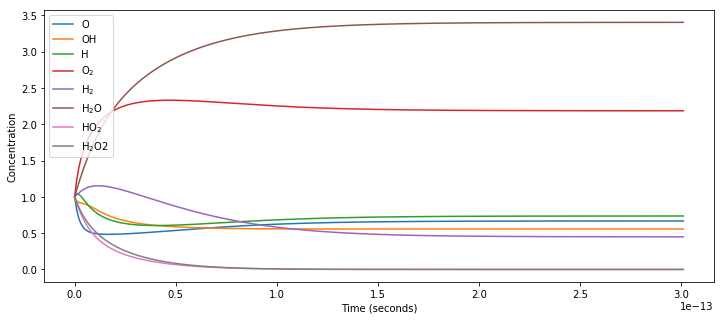

In [97]:
chem2 = chemkin("../tests/test_xml/rxns_reversible.xml")
# initial concentration
x_init = np.ones(8)
T = 2000
t_final = 3.e-13
t_step = 1.e-15
cs = ChemSolver(chem2).solve(x_init, T, t_final, t_step, algorithm = 'lsoda')
df_lsoda = cs.to_df()
def plot_demo(df):
    plt.figure(figsize = (12,5))
    plt.plot(df['t'],df['O-Concentration'], label = 'O')
    plt.plot(df['t'],df['OH-Concentration'], label = 'OH')
    plt.plot(df['t'],df['H-Concentration'], label = 'H')
    plt.plot(df['t'],df['O2-Concentration'], label = 'O$_2$')
    plt.plot(df['t'],df['H2-Concentration'], label = 'H$_2$')
    plt.plot(df['t'],df['H2O-Concentration'], label = 'H$_2$O')
    plt.plot(df['t'],df['HO2-Concentration'], label = 'HO$_2$')
    plt.plot(df['t'],df['H2O2-Concentration'], label = 'H$_2$O2')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Concentration')
    plt.legend()
plot_demo(df_lsoda)
df_lsoda.tail(10)

Finished reading xml input file


,t,H-Concentration,O-Concentration,OH-Concentration,H2-Concentration,H2O-Concentration,O2-Concentration,HO2-Concentration,H2O2-Concentration,H-Reaction_rate,O-Reaction_rate,OH-Reaction_rate,H2-Reaction_rate,H2O-Reaction_rate,O2-Reaction_rate,HO2-Reaction_rate,H2O2-Reaction_rate,T
292,2.920000e-13,0.736306,0.667539,0.557103,0.449453,3.403840,2.185755,0.000004,1.940584e-07,7.559216e+09,5.605934e+09,2.119051e+08,-1.706549e+10,1.319470e+10,-9.486789e+09,-9.409892e+06,-1.007113e+07,2000.0
293,2.930000e-13,0.736313,0.667544,0.557104,0.449437,3.403853,2.185746,0.000004,1.842636e-07,7.344354e+09,5.446367e+09,2.060483e+08,-1.657990e+10,1.281867e+10,-9.217119e+09,-8.900205e+06,-9.523568e+06,2000.0
294,2.940000e-13,0.736320,0.667550,0.557104,0.449420,3.403866,2.185736,0.000004,1.750014e-07,7.135587e+09,5.291339e+09,2.003487e+08,-1.610811e+10,1.245336e+10,-8.955098e+09,-8.418163e+06,-9.005774e+06,2000.0
295,2.950000e-13,0.736327,0.667555,0.557104,0.449404,3.403878,2.185728,0.000004,1.662427e-07,6.932741e+09,5.140719e+09,1.948022e+08,-1.564973e+10,1.209845e+10,-8.700510e+09,-7.962266e+06,-8.516127e+06,2000.0
296,2.960000e-13,0.736334,0.667560,0.557104,0.449389,3.403890,2.185719,0.000004,1.579603e-07,6.735650e+09,4.994383e+09,1.894051e+08,-1.520438e+10,1.175367e+10,-8.453145e+09,-7.531095e+06,-8.053097e+06,2000.0
297,2.970000e-13,0.736341,0.667565,0.557104,0.449374,3.403901,2.185711,0.000004,1.501281e-07,6.544150e+09,4.852209e+09,1.841535e+08,-1.477169e+10,1.141871e+10,-8.212800e+09,-7.123308e+06,-7.615237e+06,2000.0
298,2.980000e-13,0.736347,0.667570,0.557105,0.449359,3.403913,2.185703,0.000004,1.427219e-07,6.358085e+09,4.714080e+09,1.790437e+08,-1.435130e+10,1.109330e+10,-7.979275e+09,-6.737637e+06,-7.201180e+06,2000.0
299,2.990000e-13,0.736353,0.667574,0.557105,0.449345,3.403924,2.185695,0.000004,1.357183e-07,6.177299e+09,4.579879e+09,1.740721e+08,-1.394286e+10,1.077717e+10,-7.752378e+09,-6.372882e+06,-6.809632e+06,2000.0
300,3.000000e-13,0.736360,0.667579,0.557105,0.449332,3.403934,2.185687,0.000004,1.290955e-07,6.001645e+09,4.449496e+09,1.692353e+08,-1.354603e+10,1.047005e+10,-7.531922e+09,-6.027907e+06,-6.439370e+06,2000.0
301,3.010000e-13,0.736365,0.667583,0.557105,0.449318,3.403945,2.185680,0.000004,1.228328e-07,5.830976e+09,4.322821e+09,1.645296e+08,-1.316049e+10,1.017168e+10,-7.317723e+09,-5.701640e+06,-6.089237e+06,2000.0


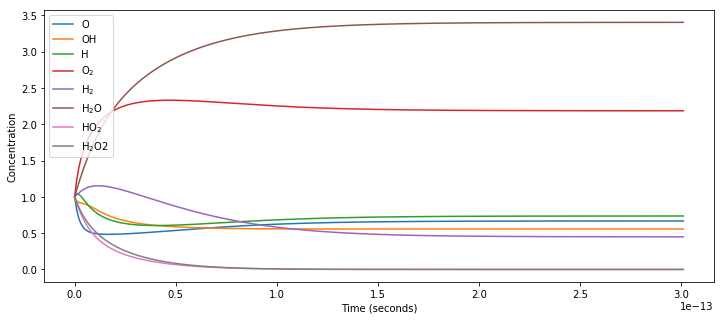

In [98]:
chem2 = chemkin("../tests/test_xml/rxns_reversible.xml")
# initial concentration
x_init = np.ones(8)
T = 2000
t_final = 3.e-13
t_step = 1.e-15
cs = ChemSolver(chem2).solve(x_init, T, t_final, t_step, algorithm = 'dopri5')
df_dopri5 = cs.to_df()
def plot_demo(df):
    plt.figure(figsize = (12,5))
    plt.plot(df['t'],df['O-Concentration'], label = 'O')
    plt.plot(df['t'],df['OH-Concentration'], label = 'OH')
    plt.plot(df['t'],df['H-Concentration'], label = 'H')
    plt.plot(df['t'],df['O2-Concentration'], label = 'O$_2$')
    plt.plot(df['t'],df['H2-Concentration'], label = 'H$_2$')
    plt.plot(df['t'],df['H2O-Concentration'], label = 'H$_2$O')
    plt.plot(df['t'],df['HO2-Concentration'], label = 'HO$_2$')
    plt.plot(df['t'],df['H2O2-Concentration'], label = 'H$_2$O2')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Concentration')
    plt.legend()
plot_demo(df_dopri5)
df_dopri5.tail(10)

Finished reading xml input file


,t,H-Concentration,O-Concentration,OH-Concentration,H2-Concentration,H2O-Concentration,O2-Concentration,HO2-Concentration,H2O2-Concentration,H-Reaction_rate,O-Reaction_rate,OH-Reaction_rate,H2-Reaction_rate,H2O-Reaction_rate,O2-Reaction_rate,HO2-Reaction_rate,H2O2-Reaction_rate,T
292,2.920000e-13,0.736306,0.667539,0.557103,0.449453,3.403840,2.185755,0.000004,1.940584e-07,7.559216e+09,5.605934e+09,2.119051e+08,-1.706549e+10,1.319470e+10,-9.486789e+09,-9.409892e+06,-1.007113e+07,2000.0
293,2.930000e-13,0.736313,0.667544,0.557104,0.449437,3.403853,2.185746,0.000004,1.842636e-07,7.344354e+09,5.446367e+09,2.060483e+08,-1.657990e+10,1.281867e+10,-9.217119e+09,-8.900205e+06,-9.523568e+06,2000.0
294,2.940000e-13,0.736320,0.667550,0.557104,0.449420,3.403866,2.185736,0.000004,1.750014e-07,7.135587e+09,5.291339e+09,2.003487e+08,-1.610811e+10,1.245336e+10,-8.955097e+09,-8.418163e+06,-9.005774e+06,2000.0
295,2.950000e-13,0.736327,0.667555,0.557104,0.449404,3.403878,2.185728,0.000004,1.662427e-07,6.932741e+09,5.140719e+09,1.948022e+08,-1.564973e+10,1.209845e+10,-8.700510e+09,-7.962266e+06,-8.516127e+06,2000.0
296,2.960000e-13,0.736334,0.667560,0.557104,0.449389,3.403890,2.185719,0.000004,1.579603e-07,6.735650e+09,4.994383e+09,1.894051e+08,-1.520438e+10,1.175367e+10,-8.453145e+09,-7.531095e+06,-8.053096e+06,2000.0
297,2.970000e-13,0.736341,0.667565,0.557104,0.449374,3.403901,2.185711,0.000004,1.501281e-07,6.544150e+09,4.852209e+09,1.841535e+08,-1.477169e+10,1.141871e+10,-8.212800e+09,-7.123308e+06,-7.615237e+06,2000.0
298,2.980000e-13,0.736347,0.667570,0.557105,0.449359,3.403913,2.185703,0.000004,1.427219e-07,6.358085e+09,4.714080e+09,1.790437e+08,-1.435130e+10,1.109330e+10,-7.979275e+09,-6.737637e+06,-7.201180e+06,2000.0
299,2.990000e-13,0.736353,0.667574,0.557105,0.449345,3.403924,2.185695,0.000004,1.357183e-07,6.177299e+09,4.579879e+09,1.740721e+08,-1.394286e+10,1.077717e+10,-7.752378e+09,-6.372882e+06,-6.809632e+06,2000.0
300,3.000000e-13,0.736360,0.667579,0.557105,0.449332,3.403934,2.185687,0.000004,1.290955e-07,6.001645e+09,4.449496e+09,1.692353e+08,-1.354603e+10,1.047005e+10,-7.531922e+09,-6.027907e+06,-6.439370e+06,2000.0
301,3.010000e-13,0.736365,0.667583,0.557105,0.449318,3.403945,2.185680,0.000004,1.228328e-07,5.830976e+09,4.322821e+09,1.645296e+08,-1.316049e+10,1.017168e+10,-7.317723e+09,-5.701640e+06,-6.089236e+06,2000.0


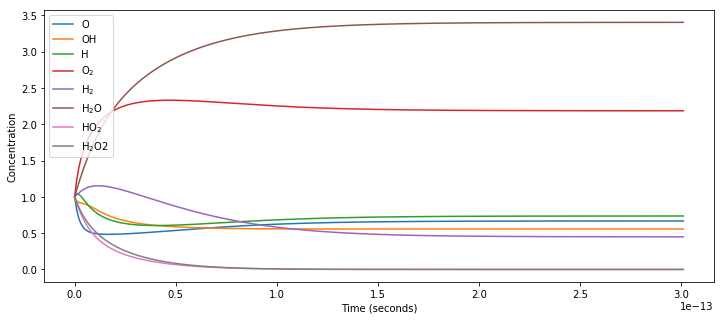

In [99]:
chem2 = chemkin("../tests/test_xml/rxns_reversible.xml")
# initial concentration
x_init = np.ones(8)
T = 2000
t_final = 3.e-13
t_step = 1.e-15
cs = ChemSolver(chem2).solve(x_init, T, t_final, t_step, algorithm = 'dop853')
df_dop853 = cs.to_df()
def plot_demo(df):
    plt.figure(figsize = (12,5))
    plt.plot(df['t'],df['O-Concentration'], label = 'O')
    plt.plot(df['t'],df['OH-Concentration'], label = 'OH')
    plt.plot(df['t'],df['H-Concentration'], label = 'H')
    plt.plot(df['t'],df['O2-Concentration'], label = 'O$_2$')
    plt.plot(df['t'],df['H2-Concentration'], label = 'H$_2$')
    plt.plot(df['t'],df['H2O-Concentration'], label = 'H$_2$O')
    plt.plot(df['t'],df['HO2-Concentration'], label = 'HO$_2$')
    plt.plot(df['t'],df['H2O2-Concentration'], label = 'H$_2$O2')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Concentration')
    plt.legend()
plot_demo(df_dop853)
df_dop853.tail(10)